# Mask filling
in a **pipeline** refers to using a **natural language processing (NLP)** model, specifically a **fill-mask task model**, *to predict a missing word *(the **"mask"**) within a sentence.

This is done by feeding the model a sentence with a placeholder like **`[MASK]`** or **`<mask>`**.

The **pipeline** then *returns the most probable words to fill that gap,* based on the surrounding context. This technique, also known as a **cloze test**, is used for tasks like
* language learning,
* content generation, and
* data augmentation.

# How it works
1. **Inputting a masked prompt:** You provide a sentence to the **pipeline** with a special token representing the masked word (e.g., *"The capital of France is "*).
2. **Model prediction:** The **fill-mask model** analyzes the sentence and predicts the most likely word(s) to replace the mask token, based on its training.
3. **Outputting results:** The **pipeline** returns the predicted word(s), along with their scores (probability), to fill the gap.

# Examples of Use Cases
* **Language Learning:**
Creating fill-in-the-blank exercises for students.
* **Content Generation:**
Assisting writers in completing sentences or suggesting words.
* **Data Augmentation:**
Generating more diverse training data for other **NLP** tasks by predicting masked words in existing sentences.
* **Domain-Specific Tasks:**
Training models on specific datasets (like medical research papers) to understand and fill in context-specific information.

In [1]:
from transformers import pipeline

In [2]:
unmasker = pipeline("fill-mask")
unmasker("Amit is the most dynamic, aggressive and intelligent AI <mask>.", top_k=4)

No model was supplied, defaulted to distilbert/distilroberta-base and revision fb53ab8 (https://huggingface.co/distilbert/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at distilbert/distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedL

[{'score': 0.04801853001117706,
  'token': 869,
  'token_str': ' player',
  'sequence': 'Amit is the most dynamic, aggressive and intelligent AI player.'},
 {'score': 0.04232377931475639,
  'token': 36749,
  'token_str': ' imaginable',
  'sequence': 'Amit is the most dynamic, aggressive and intelligent AI imaginable.'},
 {'score': 0.04084310308098793,
  'token': 655,
  'token_str': ' ever',
  'sequence': 'Amit is the most dynamic, aggressive and intelligent AI ever.'},
 {'score': 0.037871986627578735,
  'token': 1984,
  'token_str': ' candidate',
  'sequence': 'Amit is the most dynamic, aggressive and intelligent AI candidate.'}]

* The **`top_k`** argument controls how many possibilities you want to be displayed. Note that here the model fills in the special **`<mask>`** word, which is often referred to as a mask token.

* Other **mask-filling models** might have different **mask tokens**, so it’s always good to verify the proper **mask word** when exploring other **models**.

* One way to check it is by looking at the **mask** word used in the widget.

# [BERT multilingual base model (cased)](https://huggingface.co/google-bert/bert-base-multilingual-cased)

Pretrained model on the top **104 languages** with the largest Wikipedia using a **masked language modeling** (**MLM**) objective. It was introduced in [this paper](https://arxiv.org/abs/1810.04805) and first released in [this repository](https://github.com/google-research/bert).

**This model is case sensitive:** it makes a difference between english and English.



> # "Please make sure your grammar is accurate and appropriate."




#### Use of `top_k` predictions:
 Use the **`top_k`** parameter in the **`fill-mask`** pipeline to retrieve a *list of the most probable predictions*, along with their scores. This will give you a broader set of potential fills for the mask.

In [3]:
unmasker = pipeline("fill-mask", model="google-bert/bert-base-multilingual-cased",)

# results = unmasker("Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI [MASK].", top_k=10)

# Original sentence with [MASK]
sentence = "Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI [MASK]."

results = unmasker(sentence, top_k=10)

for result in results:
    print(result)

Some weights of the model checkpoint at google-bert/bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


{'score': 0.03283727541565895, 'token': 101084, 'token_str': 'researcher', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI researcher.'}
{'score': 0.03279746323823929, 'token': 59248, 'token_str': 'scientist', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI scientist.'}
{'score': 0.024938244372606277, 'token': 13853, 'token_str': 'professor', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI professor.'}
{'score': 0.02261822298169136, 'token': 49024, 'token_str': 'activist', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI activist.'}
{'score': 0.02230711467564106, 'token': 24996,

**Filter by your keyword list:** Iterate through the **results** and filter for predictions whose `token_str` (the predicted word) is present in your predefined list of keywords.

* Normalize the case before comparison
* Remove leading/trailing spaces

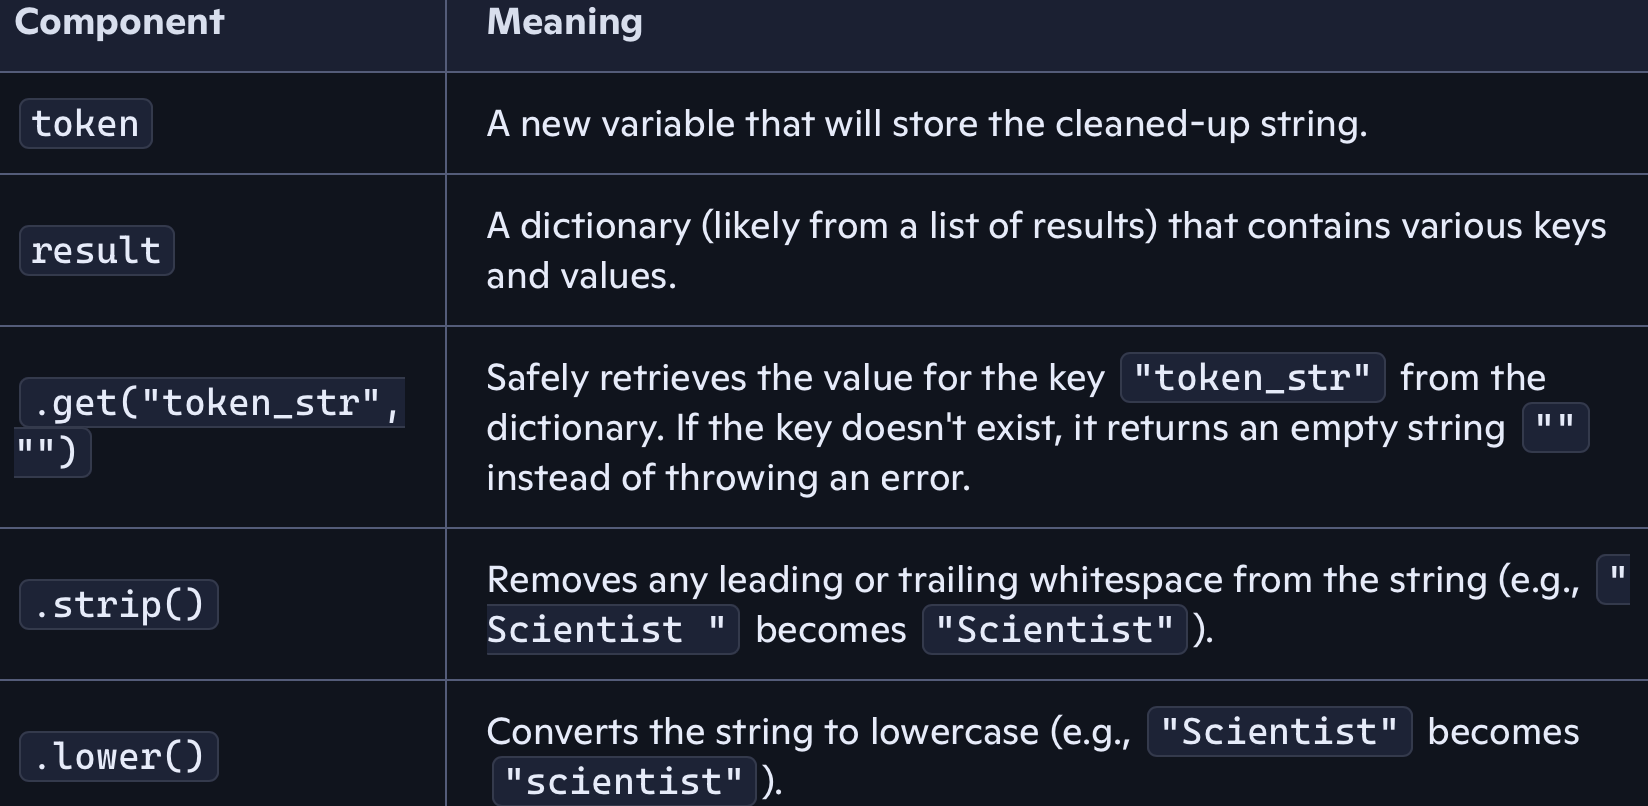

In [4]:
keywords = ["Researcher", "Scientist", "Professor"]
filtered_keyword =[]

for result in results:
  # clean each word, value of dictionary; results having key as 'token_str' by removing leading & trailing whitespace and then converting all letters of word to lowercase
  token = result.get("token_str", "").strip().lower()

  for word in keywords:
    # make all words of 'keywords' to lowercase
    if token in word.lower():
      filtered_keyword.append(token)

for result in filtered_keyword:
    print(result)

researcher
scientist
professor


In [5]:
filtered_keyword = [
  result.get("token_str", "").strip().lower()
  for result in results
  if result.get("token_str", "").strip().lower() in [word.lower() for word in keywords]
  ]
filtered_keyword

['researcher', 'scientist', 'professor']

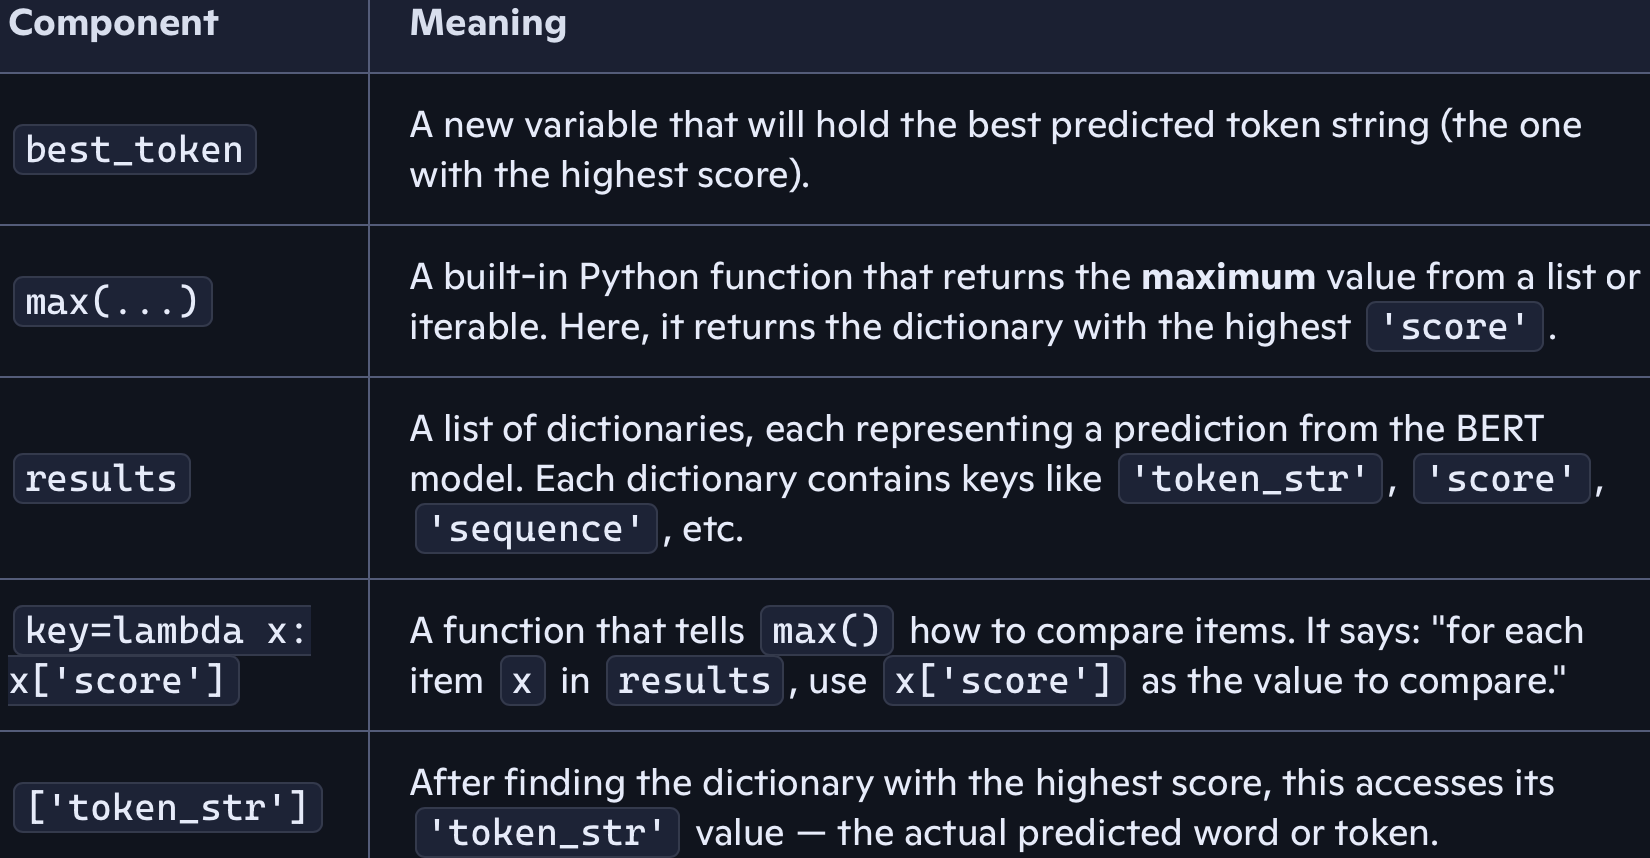

In [6]:
# from transformers import pipeline

# # Load the fill-mask pipeline
# unmasker = pipeline("fill-mask", model="google-bert/bert-base-multilingual-cased")

# Original sentence with [MASK]
# sentence = "Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI [MASK]."

# Get top 10 predictions
results = unmasker(sentence, top_k=10)
print("Results =>")
# Print all results
for result in results:
  print(result)

# Get the 'token_str' with the highest score value
# best_token_str = max(results, key=lambda x: x['score'])['token_str']
best_token = max(results, key=lambda x: x['score'])
print("\nbest_score: =>", best_token['score'])
print("\nbest_token_str: =>", best_token['token_str'])

best_token_str = max(results, key=lambda x: x['score'])['token_str']

# print("\nbest_token_str: ", best_token_str)

# Rewrite the sentence with the best token
new_sentence = sentence.replace("[MASK]", best_token_str)

print("\nRewritten Sentence:")
print(new_sentence)

Results =>
{'score': 0.03283727541565895, 'token': 101084, 'token_str': 'researcher', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI researcher.'}
{'score': 0.03279746323823929, 'token': 59248, 'token_str': 'scientist', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI scientist.'}
{'score': 0.024938244372606277, 'token': 13853, 'token_str': 'professor', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI professor.'}
{'score': 0.02261822298169136, 'token': 49024, 'token_str': 'activist', 'sequence': 'Amit does the Scientific search, innovative, development, debugging in the field of AI for further improvement of AI field. Amit, is an AI activist.'}
{'score': 0.02230711467564106, 'tok